In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Flatten
import cv2

In [ ]:
# !pip install split-folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import splitfolders
# splitfolders.ratio('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise', output="/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/output", seed=1337, ratio=(.8,.1,.1))

Copying files: 1784 files [00:29, 60.83 files/s] 


folder split sat

In [ ]:
# import splitfolders
# splitfolders.ratio('/content/drive/MyDrive/Final year project 22-23/augmented_sat', output="/content/drive/MyDrive/Final year project 22-23/augmented_sat/output", seed=1337, ratio=(.8,.1,.1))

Copying files: 1585 files [00:18, 84.68 files/s] 


folder split blue

In [ ]:
# import splitfolders
# splitfolders.ratio('/content/drive/MyDrive/Final year project 22-23/augmented_blue', output="/content/drive/MyDrive/Final year project 22-23/augmented_blue/output", seed=1337, ratio=(.8,.1,.1))

Copying files: 1585 files [00:17, 92.11 files/s]


folder split hsv

In [ ]:
# import splitfolders
# splitfolders.ratio('/content/drive/MyDrive/Final year project 22-23/augmented_hsv', output="/content/drive/MyDrive/Final year project 22-23/augmented_hsv/output", seed=1337, ratio=(.8,.1,.1))

Copying files: 1585 files [00:19, 82.76 files/s] 


In [ ]:
# TRAINING_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/output/train'
# TEST_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/output/test'
# VAL_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/output/val'

In [ ]:
# TRAINING_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/output/train'
# TEST_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/output/test'
# VAL_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/output/val'

In [ ]:
# TRAINING_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_sat/output/train'
# TEST_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_sat/output/test'
# VAL_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_sat/output/val'

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_blue/output/train'
TEST_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_blue/output/test'
VAL_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_blue/output/val'

In [ ]:
# TRAINING_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_hsv/output/train'
# TEST_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_hsv/output/test'
# VAL_DIR = '/content/drive/MyDrive/Final year project 22-23/augmented_hsv/output/val'

In [ ]:
# classes = ["diode_thermal","dust_thermal","multi_thermal","pid_thermal","single_thermal"]

In [ ]:
classes = ["diode","dust","multi","pid","single"]

In [ ]:
INIT_LR = 1e-1
BS = 32
EPOCHS = 100

In [ ]:
training_size = 0
test_size = 0
val_size = 0
for i in classes:
  training_size += len(glob(TRAINING_DIR+"/"+i+"/*"))
  test_size += len(glob(TEST_DIR+"/"+i+"/*"))
  val_size += len(glob(VAL_DIR+"/"+i+"/*"))

In [ ]:
print(training_size,test_size,val_size)

1267 161 157


In [ ]:
# diode_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/diode_thermal'
# dust_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/dust_thermal'
# multi_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/multi_thermal'
# pid_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/pid_thermal'
# single_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/single_thermal'

In [ ]:
# diode_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/diode_thermal'
# dust_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/dust_thermal'
# multi_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/multi_thermal'
# pid_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/pid_thermal'
# single_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_dataset/single_thermal'

In [ ]:
# diode_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_sat/diode'
# dust_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_sat/dust'
# multi_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_sat/multi'
# pid_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_sat/pid'
# single_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_sat/single'

In [ ]:
diode_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_blue/diode'
dust_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_blue/dust'
multi_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_blue/multi'
pid_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_blue/pid'
single_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_blue/single'

In [ ]:
# diode_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_hsv/diode'
# dust_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_hsv/dust'
# multi_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_hsv/multi'
# pid_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_hsv/pid'
# single_DIR= '/content/drive/MyDrive/Final year project 22-23/augmented_hsv/single'

In [ ]:
diode_c = len(glob(diode_DIR+"/*"))
dust_c = len(glob(dust_DIR+"/*"))
multi_c = len(glob(multi_DIR+"/*"))
pid_c = len(glob(pid_DIR+"/*"))
single_c = len(glob(single_DIR+"/*"))
class_weight = [diode_c, dust_c, multi_c, pid_c, single_c]
class_weight

[280, 156, 299, 350, 500]

In [ ]:
x = max(class_weight)
for i in range(0,len(class_weight)):
  class_weight[i] = round(x/class_weight[i],2)
class_weight
class_weights = {}
for i in range(0,len(class_weight)):
  class_weights[i] = class_weight[i]
class_weights

{0: 1.79, 1: 3.21, 2: 1.67, 3: 1.43, 4: 1.0}

In [ ]:
train_image_generator = ImageDataGenerator(rescale = 1.0/255.,
      #rotation_range=5,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )
validation_image_generator = ImageDataGenerator( rescale = 1.0/255.,
      #rotation_range=5,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

In [ ]:
train_generator = train_image_generator.flow_from_directory(TRAINING_DIR,target_size=(224,224),class_mode='categorical')

Found 1267 images belonging to 5 classes.


In [ ]:
valid_generator = validation_image_generator.flow_from_directory(VAL_DIR,target_size=(224,224),class_mode="categorical")

Found 157 images belonging to 5 classes.


In [ ]:
test_generator = validation_image_generator.flow_from_directory(TEST_DIR,target_size=(224,224),class_mode="categorical")

Found 161 images belonging to 5 classes.


In [ ]:
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

{0: 'diode', 1: 'dust', 2: 'multi', 3: 'pid', 4: 'single'}

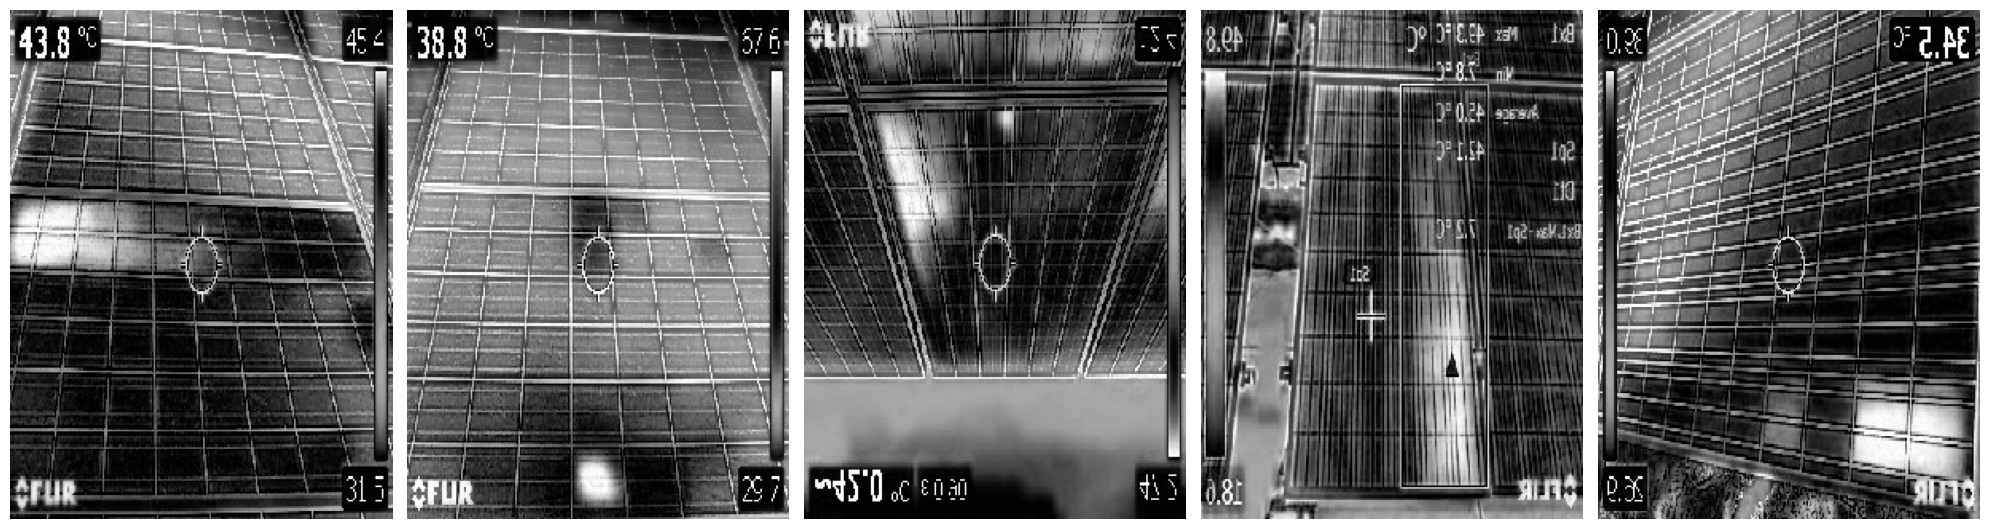

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
sample_training_data, sample_training_label = next(train_generator)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_data[:5])
print(sample_training_label[:5])

In [ ]:
base_model = keras.applications.ResNet50V2(weights="imagenet",include_top=False,input_shape=(224,224,3),pooling='avg')

for layer in base_model.layers:
  layer.trainable = False
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 320, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 326, 246, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 160, 120, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 21.4 MB/s eta 0:00:00


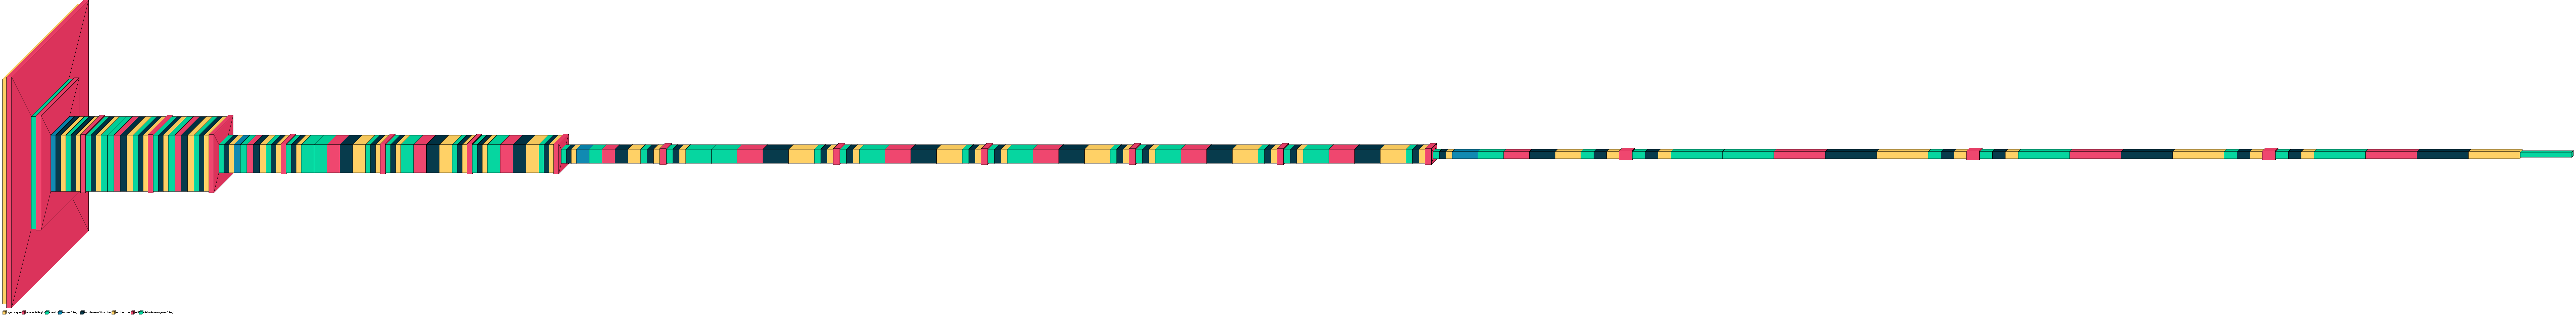

In [ ]:
from PIL import ImageFont
import visualkeras
font = ImageFont.load_default()
visualkeras.layered_view(base_model, legend=True, font=font, spacing=0) # selected font


In [ ]:
model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Dense(5, activation = "softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_4 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=INIT_LR),
        loss="categorical_crossentropy",
        metrics=["accuracy"])

In [ ]:
# root_logdir = os.path.join(os.curdir, "my_logs")
# def get_run_logdir():
#   import time
#   run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
#   return os.path.join(root_logdir, run_id)
# run_logdir = get_run_logdir()


In [ ]:
# tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50,restore_best_weights=True)
history = model.fit(train_generator, validation_data=valid_generator, epochs=EPOCHS, callbacks =[early_stopping_cb], class_weight=class_weights)
model.save("/content/drive/MyDrive/Final year project 22-23/test_RESNET50v2_hsv.h5")

Epoch 1/100
40/40 [==============================] - 12s 199ms/step - loss: 46.4687 - accuracy: 0.4617 - val_loss: 21.7692 - val_accuracy: 0.5032
Epoch 2/100
40/40 [==============================] - 8s 207ms/step - loss: 27.2159 - accuracy: 0.5493 - val_loss: 7.6136 - val_accuracy: 0.6497
Epoch 3/100
40/40 [==============================] - 7s 181ms/step - loss: 24.1511 - accuracy: 0.5714 - val_loss: 23.7519 - val_accuracy: 0.4204
Epoch 4/100
40/40 [==============================] - 7s 162ms/step - loss: 18.6540 - accuracy: 0.6582 - val_loss: 29.7334 - val_accuracy: 0.4204
Epoch 5/100
40/40 [==============================] - 7s 182ms/step - loss: 18.8512 - accuracy: 0.6298 - val_loss: 17.3270 - val_accuracy: 0.5159
Epoch 6/100
40/40 [==============================] - 7s 167ms/step - loss: 16.2521 - accuracy: 0.6898 - val_loss: 23.6410 - val_accuracy: 0.5924
Epoch 7/100
40/40 [==============================] - 7s 184ms/step - loss: 15.7857 - accuracy: 0.6938 - val_loss: 17.1989 - val_ac

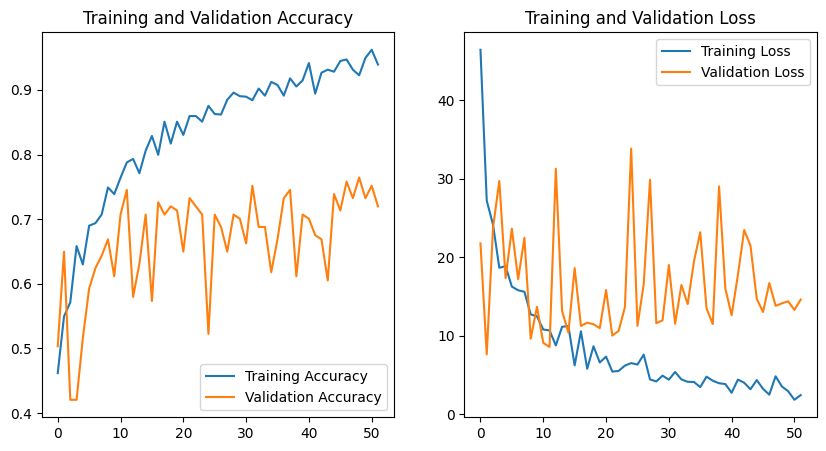

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = len(history.epoch)
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
baseline_results = model.evaluate(test_generator, batch_size=BS, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print('Test', name, ': ', value)
print()

Test loss :  6.212235927581787
Test accuracy :  0.6894409656524658



1/1 [==============================] - 9s 9s/step
3


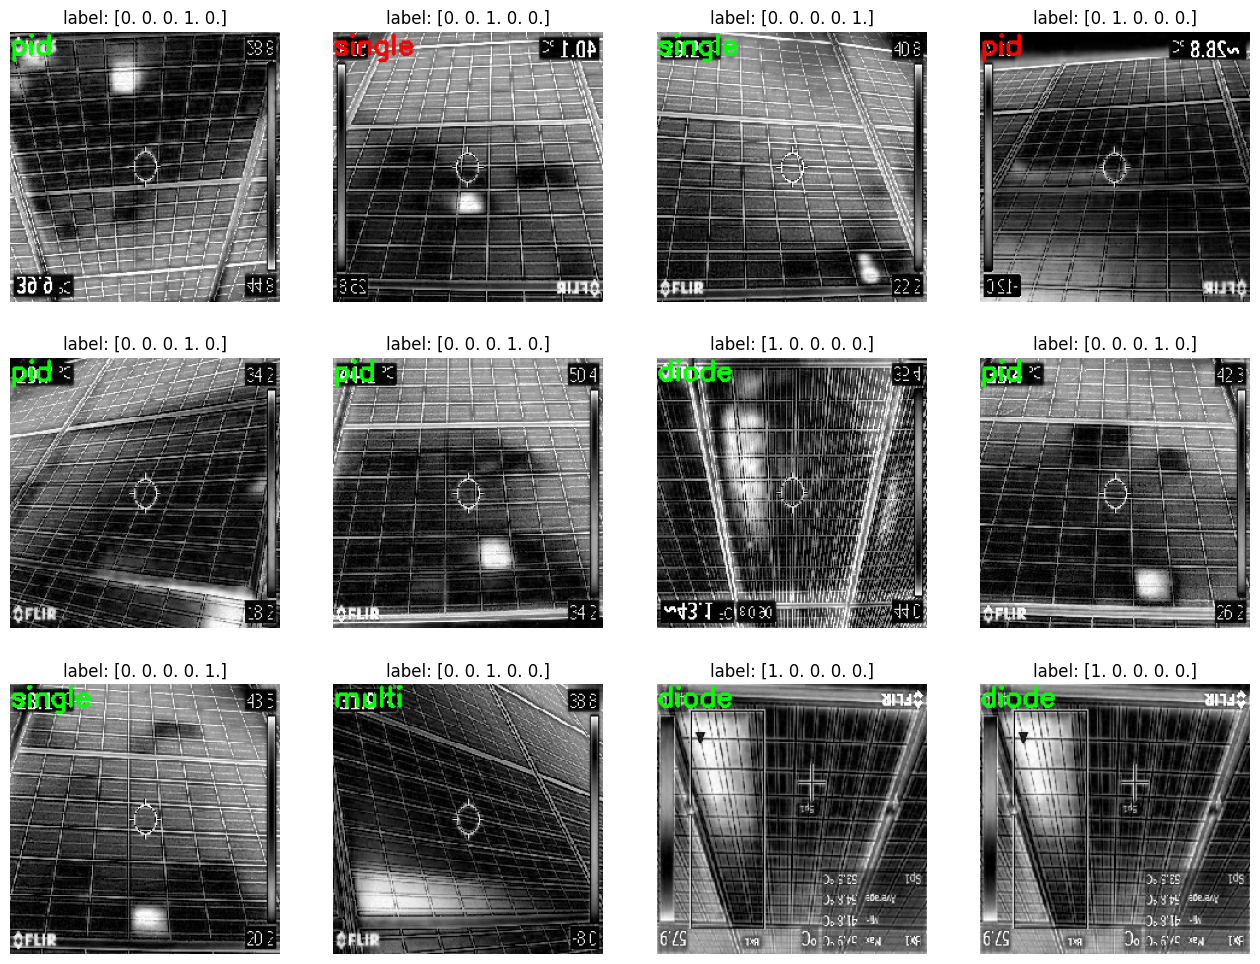

In [ ]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# set up matplotlib fig, and size it to fit 3x4 pics
nrows = 3
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# randomly select a few testing digits
num_predictions = 12
testData,testLabels = next(test_generator)
test_indices = np.random.choice(np.arange(0, len(testLabels)), size=(num_predictions,))
test_images = np.stack(([testData[i] for i in test_indices]))
test_labels = np.stack(([testLabels[i] for i in test_indices]))

"""
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_data[:5])
"""

# compute predictions
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))



for i in range(num_predictions):
    # select the most probable class
    prediction = np.argmax(predictions[i])
    test_label = np.argmax(test_labels[i])

    # rescale the test image
    image = (test_images[i] * 255).astype("uint8")

    # select prediction text color
    if prediction == test_label:
        rgb_color = (0, 255, 0) # green for correct predictions
    else:
        rgb_color = (255, 0, 0) # red for wrong predictions

    # show the image and prediction
    cv2.putText(image, str(labels[prediction]), (0, 18),cv2.FONT_HERSHEY_SIMPLEX,0.75,rgb_color, 2)

    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1, title="label: %s" % test_labels[i])
    sp.axis('Off') # don't show axes (or gridlines)
    plt.imshow(image)

# show figure matrix
plt.show()

In [ ]:
pred=[]
true=[]
for i in range(len(test_generator)):
    testData, testLabels = test_generator.next()
    test_labels = np.stack(([testLabels[i] for i in range(len(testLabels))]))
    test_images = np.stack(([testData[i] for i in range(len(testLabels))]))
    predicted = model.predict(test_images)
    true+=list(np.argmax(test_labels,axis=1))
    pred+=list(np.argmax(predicted, axis=1))

1/1 [==============================] - 0s 64ms/step


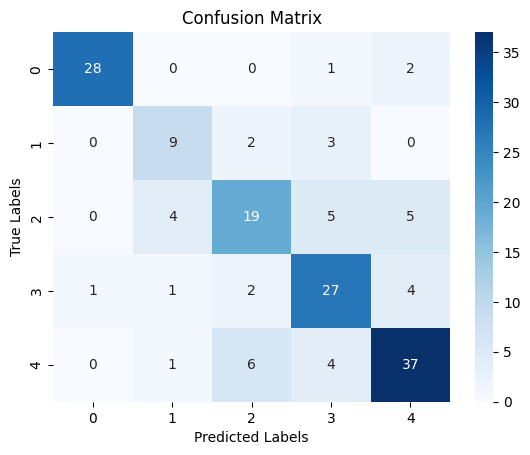

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(true, pred)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
og='/content/drive/MyDrive/Final year project 22-23/augmented_dataset'
hsv='/content/drive/MyDrive/Final year project 22-23/augmented_hsv'
blue='/content/drive/MyDrive/Final year project 22-23/augmented_blue'
sat='/content/drive/MyDrive/Final year project 22-23/augmented_sat'
count=0
for folder in os.listdir(og):
  if folder=='output':
    continue
  f=folder.split('_')[0]
  path = os.path.join(og,folder)
  for files in os.listdir(path):
    img_path=os.path.join(path,files)
    hsv_path=os.path.join(og.replace('dataset', 'hsv')+'/'+f,files)
    sat_path=os.path.join(og.replace('dataset', 'sat')+'/'+f,files)
    blue_path=os.path.join(og.replace('dataset', 'blue')+'/'+f,files)
    img = cv2.imread(img_path)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    sat_img = hsv_img[:,:,1]
    blue_img = img[:,:,0]
    cv2.imwrite(hsv_path,hsv_img)
    cv2.imwrite(sat_path,sat_img)
    cv2.imwrite(blue_path,blue_img)
    count+=1
print(count,'images converted & saved')

1585 images converted & saved


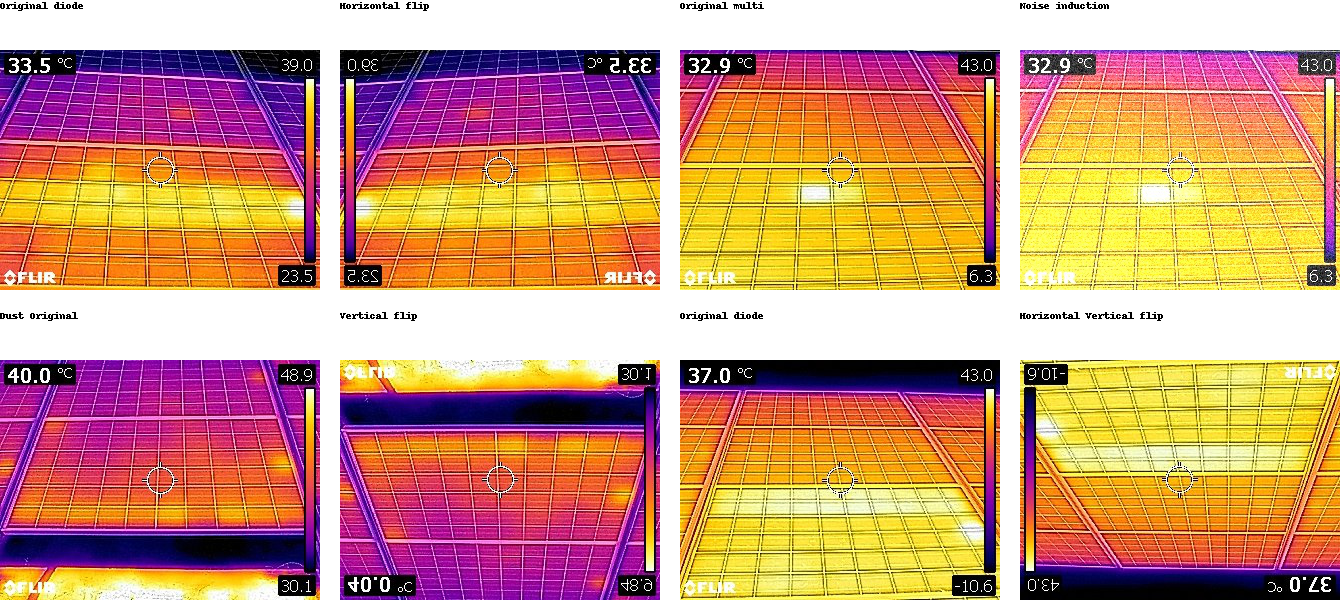

In [ ]:
from PIL import Image
from PIL import ImageDraw

# Define the images and their headings
images = [
    {'image': Image.open('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/diode_thermal/FLIR0105.jpg'), 'heading': 'Original diode'},
    {'image': Image.open('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/diode_thermal/FLIR0105_h.jpg'), 'heading': 'Horizontal flip'},
    {'image': Image.open('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/multi_thermal/FLIR0067.jpg'), 'heading': 'Original multi'},
    {'image': Image.open('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/multi_thermal/FLIR0067_n.jpg'), 'heading': 'Noise induction'},
    {'image': Image.open('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/dust_thermal/FLIR0262.jpg'), 'heading': 'Dust Original'},
    {'image': Image.open('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/dust_thermal/FLIR0262_v.jpg'), 'heading': 'Vertical flip'},
    {'image': Image.open('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/diode_thermal/FLIR0153.jpg'), 'heading': 'Original diode'},
    {'image': Image.open('/content/drive/MyDrive/Final year project 22-23/augmented_withnoise/diode_thermal/FLIR0153_hv.jpg'), 'heading': 'Horizontal Vertical flip'},
]

# Define the grid layout
columns = 4
rows = 2

# Calculate the size of each cell in the grid
cell_width = 320
cell_height = 240
spacing = 20

# Calculate the size of the grid image
grid_width = columns * (cell_width + spacing) - spacing
grid_height = rows * (cell_height + 50 + spacing) - spacing

# Create a new image for the grid
grid_image = Image.new('RGB', (grid_width, grid_height), (255, 255, 255))

# Loop through the images and add them to the grid
x = 0
y = 0
for img in images:
    # Resize the image to fit in the cell
    resized_img = img['image'].resize((cell_width, cell_height))

    # Paste the image and heading to the grid image
    grid_image.paste(resized_img, (x, y + 50))
    draw = ImageDraw.Draw(grid_image)
    draw.text((x, y), img['heading'], fill=(0,0,0))

    # Move to the next cell
    x += cell_width + spacing
    if x >= grid_width:
        x = 0
        y += cell_height + 50 + spacing

# Show the grid
grid_image.show()